In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.stats import maxwell
from scipy.stats import norm

In [9]:
#####  Function to compute time for wall collision ######
def wall_time(coord, velcomp, rad):  
    if velcomp > 0.0:
        del_t = (1.0 - rad - coord) / velcomp
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp)
    else:
        del_t = float('inf')
    return del_t


# Function to calculate time it takes for a pair of particles to collide. 
# pos1 and pos2 are positions of particles 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the particles. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2)
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t


# Function to generate an image of the disk configuration in the box.
def create_picture(positions):
    plt.cla()
    plt.gca().set_aspect('equal')
    plt.axis([0, L, 0, L])
    plt.setp(plt.gca(), xticks=[0, L], yticks=[0, L])
    for x,y in positions:
        atom = plt.Circle((x, y), Ratom, fc='r')
        plt.gca().add_patch(atom)
      

0.063078313050504
[[0.12615663 0.12615663]
 [0.31539157 0.12615663]
 [0.5046265  0.12615663]
 [0.69386144 0.12615663]
 [0.12615663 0.31539157]
 [0.31539157 0.31539157]
 [0.5046265  0.31539157]
 [0.69386144 0.31539157]
 [0.12615663 0.5046265 ]
 [0.31539157 0.5046265 ]
 [0.5046265  0.5046265 ]
 [0.69386144 0.5046265 ]
 [0.12615663 0.69386144]
 [0.31539157 0.69386144]
 [0.5046265  0.69386144]
 [0.69386144 0.69386144]]
[[ 0.58687674  0.42432521]
 [-0.48909659 -0.27092334]
 [ 0.12727203  0.76369507]
 [-0.4025824  -0.14441452]
 [ 0.72456321  0.34586229]
 [-0.07028906 -0.55352324]
 [ 0.76278857  0.9005406 ]
 [-0.53751368 -0.4196788 ]
 [ 0.8172014   0.14467509]
 [-0.71403185 -0.98960624]
 [ 0.57613072  0.27676044]
 [-0.52868127 -0.13470758]
 [ 0.0686595   0.30864817]
 [-0.54789892 -0.76897821]
 [ 0.80274613  0.63834193]
 [-0.87880009 -0.25778388]]


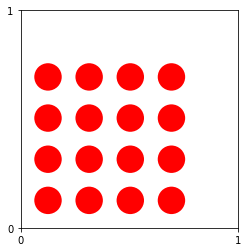

In [10]:
L = 1. ## Box edge length
N_s=4
Natoms = int((N_s)**2) # Number of disks
density = 0.2 # Fraction of the area of the box covered by the disks
Ratom = np.sqrt(density/(Natoms*np.pi))   ## Radius of disk.
print(Ratom)


## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 

## Positions and velocities of disks.
positions = np.zeros((Natoms,2))
velocities = np.zeros((Natoms,2))

for i in range (0,Natoms):
        positions[i][0]=Ratom*(3*(i%N_s)+2)
        positions[i][1]=Ratom*(3*(i//N_s)+2)
        velocities[i][0]=((-1)**i)*random.random()
        velocities[i][1]=((-1)**(i%2))*random.random()
print(positions)
print(velocities)
n_events = 20000 # Number of collision events.
create_picture(positions)
#################################################################################

In [11]:
 ############### Event Loop ##############################################
t = 0.0 # Initial time
V_array=[]
P_array=[]
for event in range(n_events):
     # Wall collision times for all disks and their velocity components.
    wall_times = [wall_time(positions[i][j], velocities[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
    next_event = min(wall_times + pair_times)  
    t += next_event 
    #print(t)
    for i in range(Natoms):
        positions[i] += velocities[i]*next_event # Evolve positions to collision event
    if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall
        wall_index = wall_times.index(next_event)
        particle, component = divmod(wall_index, 2)
        velocities[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
    if(event>5000):
        for h in range (0,Natoms):
            V_array.append(np.sqrt(np.dot(velocities[h],velocities[h])))
            #P_array.append(np.sqrt(np.dot(positions[h],positions[h])))
print(positions)
print(velocities)
#print(P_array)
##################################################################################

[[0.21846613 0.92699082]
 [0.06539549 0.88204704]
 [0.18805132 0.08152475]
 [0.80285864 0.50350537]
 [0.55042901 0.18837767]
 [0.71720494 0.24217261]
 [0.53245765 0.34504946]
 [0.64725482 0.75421559]
 [0.855474   0.31133475]
 [0.40065658 0.49933326]
 [0.77705638 0.74793729]
 [0.14564553 0.30777732]
 [0.6136006  0.06897084]
 [0.82395406 0.92229279]
 [0.51073667 0.83278892]
 [0.79528585 0.14308241]]
[[ 0.00631285  0.4321219 ]
 [ 0.10178589 -0.39483301]
 [-0.08712774  0.58370158]
 [ 0.18843538  0.04870354]
 [-0.01363707  0.41916023]
 [ 0.3098921   0.04277014]
 [-0.37430967  0.25437202]
 [ 0.04202335  1.06277789]
 [-0.65391154 -0.5347109 ]
 [ 1.75302954 -0.87989863]
 [-0.35492415 -0.13353345]
 [ 0.17177917  0.50786482]
 [-0.60458184 -0.32234453]
 [-1.02217524  0.29838995]
 [ 0.57692907 -0.05104498]
 [-0.49309463 -0.82247135]]


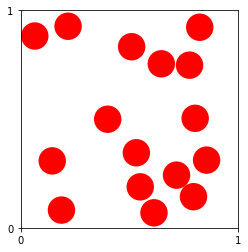

In [12]:
create_picture(positions)

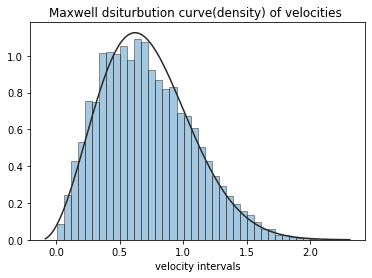

In [13]:
#plt.hist(V_array, bins=20, density=True)
sns.distplot(V_array,bins=40, hist_kws={'edgecolor':'black'}, fit=maxwell ,axlabel="velocity intervals",kde=False)
plt.title("Maxwell dsiturbution curve(density) of velocities ")
plt.show()

In [14]:
##https://indianaiproduction.com/seaborn-histogram-using-seaborn-distplot/  -- link for histogram commands